In [1]:
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *
from matplotlib import pyplot as plt
from sklearn.metrics import *
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-4])
DATA_PATH = f'{ROOT_PATH}/Datasets/migraine/migraine_data.csv'

In [3]:
def multi_roc_auc_score(gt, pred, average = 'macro'):
    
    src_lb       = set(gt)
    roc_auc_dict = {}
    
    for label in src_lb:
        dst_lb      = [lb for lb in src_lb if lb != label]
        new_gt_lb   = [0 if lb in dst_lb else 1 for lb in gt]
        new_pred_lb = [0 if lb in dst_lb else 1 for lb in pred]
        
        roc_auc             = roc_auc_score(new_gt_lb, new_pred_lb, average = average)
        roc_auc_dict[label] = f'{roc_auc:.2f}'
        
    return roc_auc_dict
        

In [4]:
df = pd.read_csv(DATA_PATH)
df.sample(3).T

,181,16,278
Age,58,40,33
Duration,1,3,1
Frequency,1,1,2
Location,1,1,1
Character,1,1,1
Intensity,3,3,3
Nausea,1,1,1
Vomit,0,0,0
Phonophobia,1,1,1
Photophobia,1,1,1


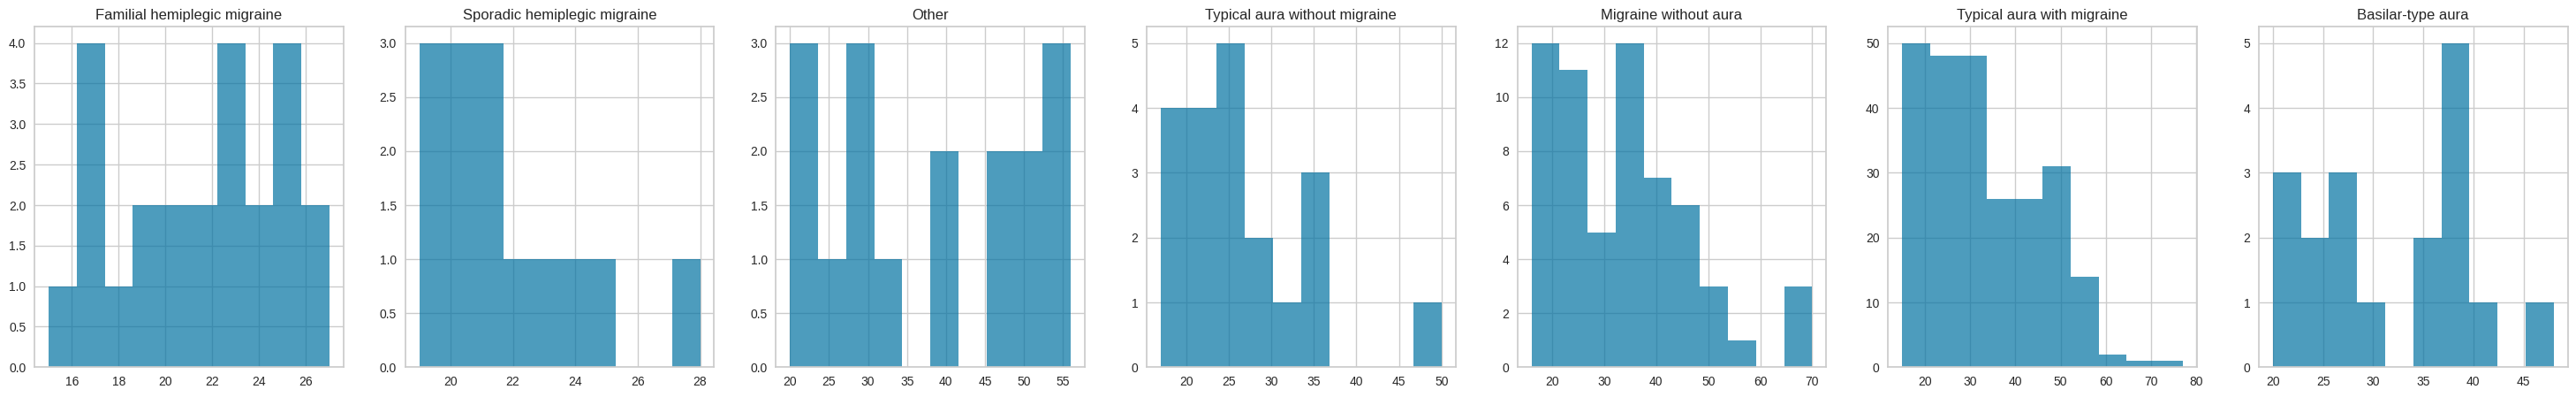

In [5]:
type_   = set(sorted(df.Type))
ages    = set(sorted(df.Age))

_, axes = plt.subplots(1, len(type_), figsize = (5*len(type_) + 2, 5))
for ax, t in zip(axes, type_):
    
    df_ = df[df.Type == t]
    ax.hist(df_.Age, alpha = 0.7)
    ax.set_title(t)

In [6]:
le      = LabelEncoder()
df.Type = le.fit_transform(df.Type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          400 non-null    int64
 1   Duration     400 non-null    int64
 2   Frequency    400 non-null    int64
 3   Location     400 non-null    int64
 4   Character    400 non-null    int64
 5   Intensity    400 non-null    int64
 6   Nausea       400 non-null    int64
 7   Vomit        400 non-null    int64
 8   Phonophobia  400 non-null    int64
 9   Photophobia  400 non-null    int64
 10  Visual       400 non-null    int64
 11  Sensory      400 non-null    int64
 12  Dysphasia    400 non-null    int64
 13  Dysarthria   400 non-null    int64
 14  Vertigo      400 non-null    int64
 15  Tinnitus     400 non-null    int64
 16  Hypoacusis   400 non-null    int64
 17  Diplopia     400 non-null    int64
 18  Defect       400 non-null    int64
 19  Ataxia       400 non-null    int64
 20  Conscience

<Axes: >

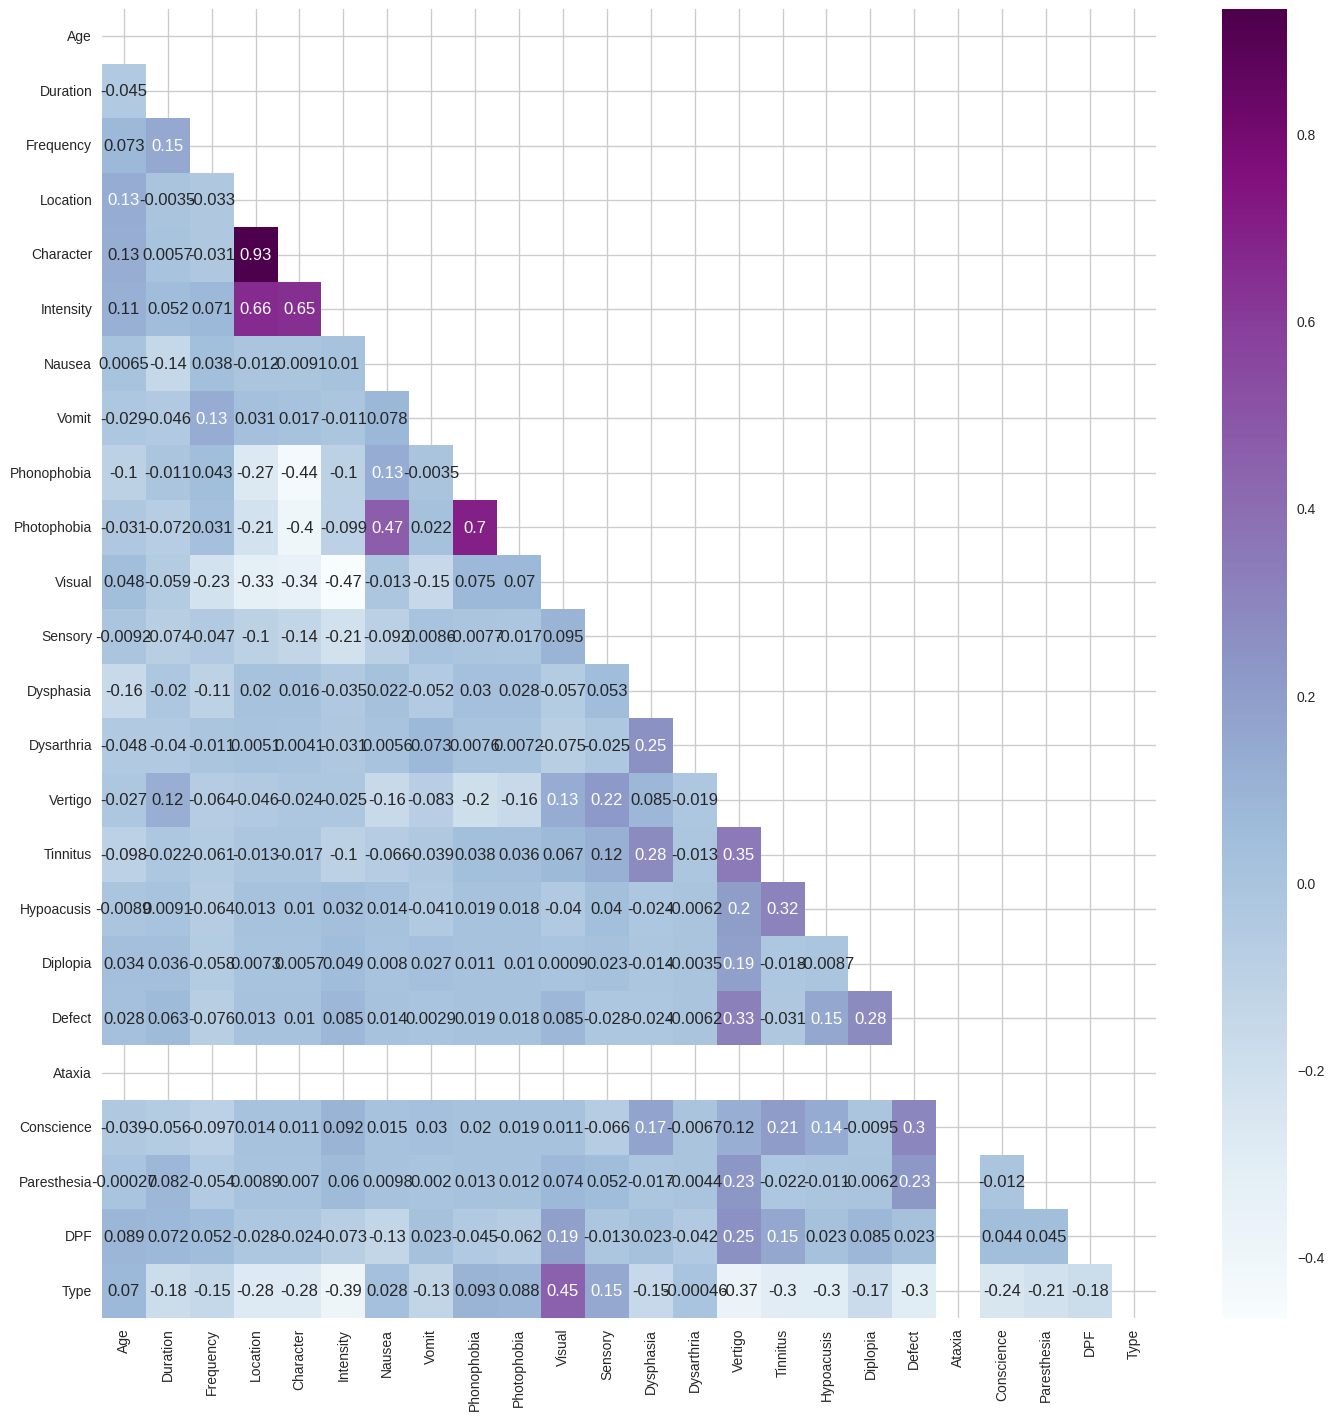

In [7]:
_, ax = plt.subplots(figsize = (17, 17))
mask  = np.triu(df.corr())
sns.heatmap(df.corr(), mask = mask, annot = True, cmap = 'BuPu')

In [8]:
drop_col = ['Age', 'Nausea', 'Phonophobia', 'Photophobia', 'Dysarthria']
y        = df.Type
x        = df.drop(drop_col + ['Type'], axis = 1)
x.sample(3).T

,397,227,219
Duration,3,1,2
Frequency,2,2,2
Location,1,1,1
Character,1,1,1
Intensity,3,2,3
Vomit,0,0,1
Visual,1,2,2
Sensory,0,0,1
Dysphasia,0,0,0
Vertigo,1,0,0


Text(0, 0.5, 'Type')

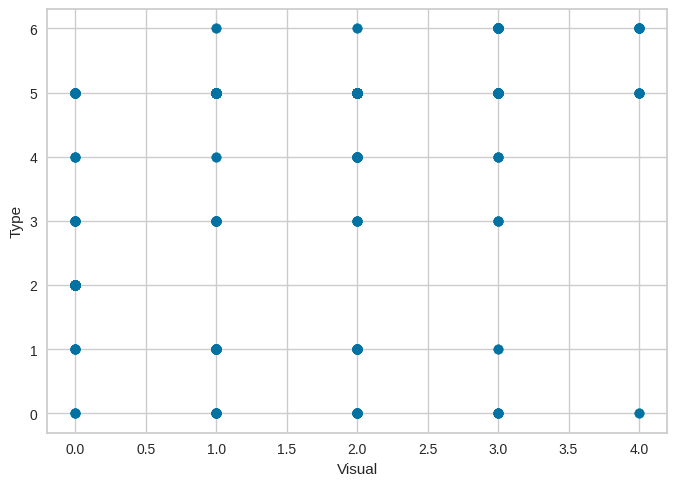

In [9]:
plt.scatter(np.array(x)[:, 6], np.array(y[:]))
plt.xlabel('Visual')
plt.ylabel('Type')

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, stratify = y,
                                                    shuffle = y, random_state = 42)

In [11]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

In [12]:
pred = rf.predict(train_x)
print(f'[TRAIN]')
print('accuracy : ', rf.score(train_x, train_y))
print(classification_report(pred, train_y))

pred = rf.predict(test_x)
print(f'[TEST]')
print('accuracy : ', rf.score(test_x, test_y))
print(classification_report(pred, test_y))

[TRAIN]
accuracy :  0.984375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.84      0.94      0.89        17
           2       1.00      1.00      1.00        48
           3       1.00      0.93      0.97        15
           4       0.91      1.00      0.95        10
           5       0.99      0.98      0.99       200
           6       1.00      1.00      1.00        16

    accuracy                           0.98       320
   macro avg       0.96      0.98      0.97       320
weighted avg       0.99      0.98      0.98       320

[TEST]
accuracy :  0.9125
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.60      0.60      0.60         5
           2       1.00      0.92      0.96        13
           3       0.67      0.67      0.67         3
           4       0.67      1.00      0.80         2
           5       0.96

In [13]:
df_          = df.drop(drop_col, axis = 1)
df_tr, df_te = train_test_split(df_, test_size = 0.2, shuffle = True, random_state = 42)
caret        = setup(data = df_tr, target = 'Type', session_id = 999,
                     fix_imbalance = True, fix_imbalance_method = 'smotetomek')

,Description,Value
0,Session id,999
1,Target,Type
2,Target type,Multiclass
3,Original data shape,"(320, 19)"
4,Transformed data shape,"(1069, 19)"
5,Transformed train set shape,"(973, 19)"
6,Transformed test set shape,"(96, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [14]:
best_model  = compare_models()
final_model = finalize_model(best_model)

pred = predict_model(final_model, df_tr)
pred = predict_model(final_model, df_te)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9016,0.4861,0.9016,0.8801,0.8861,0.8272,0.8325,0.1550
nb,Naive Bayes,0.8974,0.4766,0.8974,0.8793,0.8812,0.8220,0.8293,0.1370
rf,Random Forest Classifier,0.8794,0.4867,0.8794,0.8452,0.8567,0.7876,0.7962,0.1560
gbc,Gradient Boosting Classifier,0.8792,0.4871,0.8792,0.8586,0.8617,0.7909,0.7983,0.1770
lightgbm,Light Gradient Boosting Machine,0.8704,0.4851,0.8704,0.8392,0.8484,0.7734,0.7799,0.2290
catboost,CatBoost Classifier,0.8569,0.4810,0.8569,0.8324,0.8398,0.7454,0.7528,0.1650
dt,Decision Tree Classifier,0.8348,0.4268,0.8348,0.8074,0.8157,0.7166,0.7251,0.1370
lr,Logistic Regression,0.7769,0.4706,0.7769,0.8416,0.7918,0.6535,0.6719,0.3980
lda,Linear Discriminant Analysis,0.7769,0.4675,0.7769,0.8439,0.7863,0.6622,0.6893,0.1340
svm,SVM - Linear Kernel,0.7755,0.0000,0.7755,0.8448,0.7845,0.6576,0.6843,0.1400


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9812,0.9996,0.9812,0.9823,0.9813,0.9681,0.9682


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9000,0.9725,0.9000,0.9275,0.9084,0.8376,0.8418


In [15]:
best_model  = compare_models(n_select = 3)
blend_model = blend_models(best_model)
final_model = finalize_model(blend_model)

pred_tr     = predict_model(final_model, df_tr)
pred_te     = predict_model(final_model, df_te)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9016,0.4861,0.9016,0.8801,0.8861,0.8272,0.8325,0.0650
nb,Naive Bayes,0.8974,0.4766,0.8974,0.8793,0.8812,0.8220,0.8293,0.1350
rf,Random Forest Classifier,0.8794,0.4867,0.8794,0.8452,0.8567,0.7876,0.7962,0.1530
gbc,Gradient Boosting Classifier,0.8792,0.4871,0.8792,0.8586,0.8617,0.7909,0.7983,0.1820
lightgbm,Light Gradient Boosting Machine,0.8704,0.4851,0.8704,0.8392,0.8484,0.7734,0.7799,0.1510
catboost,CatBoost Classifier,0.8569,0.4810,0.8569,0.8324,0.8398,0.7454,0.7528,0.0680
dt,Decision Tree Classifier,0.8348,0.4268,0.8348,0.8074,0.8157,0.7166,0.7251,0.1400
lr,Logistic Regression,0.7769,0.4706,0.7769,0.8416,0.7918,0.6535,0.6719,0.1370
lda,Linear Discriminant Analysis,0.7769,0.4675,0.7769,0.8439,0.7863,0.6622,0.6893,0.1180
svm,SVM - Linear Kernel,0.7755,0.0000,0.7755,0.8448,0.7845,0.6576,0.6843,0.1530


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9979,0.9565,0.9594,0.9500,0.9243,0.9282
1,0.9130,0.9608,0.9130,0.8942,0.8921,0.8487,0.8552
2,0.9130,0.0000,0.9130,0.8507,0.8776,0.8482,0.8576
3,0.9130,0.0000,0.9130,0.8942,0.8921,0.8477,0.8543
4,0.9545,0.0000,0.9545,0.9121,0.9326,0.9137,0.9187
5,0.8636,0.0000,0.8636,0.8409,0.8485,0.7537,0.7566
6,0.8636,0.0000,0.8636,0.8636,0.8636,0.7537,0.7566
7,0.8636,0.9245,0.8636,0.7644,0.8071,0.7452,0.7558
8,0.9545,0.9913,0.9545,0.9318,0.9394,0.9197,0.9231


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9844,0.9991,0.9844,0.9844,0.9840,0.9730,0.9732


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9250,0.9958,0.9250,0.9661,0.9366,0.8797,0.8860


In [16]:
print('[TRAIN]')
print(classification_report(pred_tr.prediction_label, df_tr.Type))
print(multi_roc_auc_score(pred_tr.prediction_label, df_tr.Type))

print('[TEST]')
print(classification_report(pred_te.prediction_label, df_te.Type))
print(multi_roc_auc_score(pred_te.prediction_label, df_te.Type))

[TRAIN]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.95      0.93        20
           2       1.00      0.98      0.99        48
           3       0.85      1.00      0.92        11
           4       0.92      1.00      0.96        11
           5       1.00      0.99      0.99       201
           6       1.00      1.00      1.00        17

    accuracy                           0.98       320
   macro avg       0.95      0.99      0.97       320
weighted avg       0.99      0.98      0.98       320

{0: '1.00', 1: '0.97', 2: '0.99', 3: '1.00', 4: '1.00', 5: '0.99', 6: '1.00'}
[TEST]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.43      0.60         7
           2       1.00      1.00      1.00        13
           3       0.75      1.00      0.86         3
           4       1.00      0.50      